<a href="https://colab.research.google.com/github/DiegoRinconP/Mineria_de_datos/blob/main/AvancePIA_II_002_Equipo2_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AVANCE 2 - PIA
**Equipo**: 2

**Grupo**: 002 Miércoles

**Integrantes**: 
*   1850231 Cid Sanabria Dulce Ximena
*   1851895 Ortiz Cruz Jaclyn Lizeth
*   1849687 Rincón Pacheco Diego Alejandro
*   1854410 Serrano Caballero Lizeth

# **Sales of summer clothes in E-commerce Wish**

https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

## **Introducción**

Wish es una compañía de comercio electrónico en línea, fundada en 2010 por Peter Szulczewski y Danny Zhang, ambos ex-programadores de Google y Yahoo.

En 2017, la aplicación de compra móvil de "Wish" decía tener más de 100 millones de usuarios en iOS y Android. Actualmente, cuenta con más de 500 millones usuarios según la propia empresa. Similar a eBay, Amazon o AliExpress, fabricantes y negocios pequeños pueden vender bienes directamente a los consumidores a precios relativamente bajos.

Años más tarde, la tienda Wish añadió el Outlet, el cual vende excedentes de stock de marcas reconocidas, por debajo del precio en tienda y también añadió Wish Express, el cual ofrece envíos más rápidos. Esta empresa fue beneficiada por la pandemia, debido a que muchos usuarios empezaron a comprar más en linea a causa de las restricciones sanitarias.

##**Descripción de los datos**

a) ¿Qué tipo de datos son?

La base de datos incluye información de registros originados de la pagina web Wish acerca de las preferencias que tienen los usuarios a la hora de escribir summer (verano en inglés) en el campo de búsqueda de la plataforma. No solo muestra información acerca del producto, sino también acerca del vendedor y de las ventas.


b) Descripción de las columnas

El conjunto de datos cuenta con 63,790 datos divididos en 43 columnas y 1,573 filas donde podemos encontrar diferentes tipos de datos, como object, int y float, recolectados del registro de la venta de verano de la plataforma. En las columnas, podemos observar la descripción del producto, precio Wish y precio externo, no. de ventas, rating, sellos, envio, inventario, info del vendedor, entre otras.




## **Justificación del uso de datos**

La base de datos cuenta con datos de interés público de una compañia que ha crecido en los últimos años debido a la nueva modalidad de compras en línea. 
Hoy en día, podemos encontrar mucha competencia en el mercado de e-commerce, por lo tanto, es necesario incrementar las ventas de la plataforma.

Nos gustaría encontrar la relación entre las ventas y el rating para poder determinar una estrategía a seguir para posicionarnos como una empresa lider en compras en línea. Además, comparar el precio wish con el costo de envío para saber si depende una variable de la otra. 

## **Objetivos**

Predecir el éxito de ventas que tiene un producto de Wish.



Secundarios:
* Analizar la relación entre el rating de un producto y sus ventas.
* Comparar el precio wish con el precio externo

## **Preguntas de interés**

* ¿Qué tan diferentes son los precios dentro de Wish comparado con otras plataformas?
* ¿Qué tan satisfechos están los clientes con el producto?

## **Programación**

###**Limpieza de Datos**

El primer paso es importar las librerías que se usarán en el proceso.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')
import matplotlib.patches as mpatches
import re
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

Se carga la base de datos csv a archivos, para después llamarla y almacenarla en una variable.

In [2]:
bd=pd.read_csv('/content/summer-products-with-rating-and-performance_2020-08.csv')

Con la función shape se puede observar el número de filas y columnas de la base de datos.

In [3]:
bd.shape #regresa filas, columnas

(1573, 43)

Para ver como se forma la base de datos, la propiedades head permite mostrar las primeras 5 filas de la base de datos.



In [4]:
bd.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


Una parte importante de trabajar bases de datos es la identificación de datos nulos. Las siguientes líneas de código ejemplifican este proceso.

In [5]:
bd.isnull().sum().sort_values(ascending=False) 

merchant_profile_picture        1347
has_urgency_banner              1100
urgency_text                    1100
rating_one_count                  45
rating_two_count                  45
rating_three_count                45
rating_four_count                 45
rating_five_count                 45
product_color                     41
origin_country                    17
product_variation_size_id         14
merchant_name                      4
merchant_info_subtitle             1
crawl_month                        0
badges_count                       0
rating_count                       0
badge_product_quality              0
rating                             0
uses_ad_boosts                     0
units_sold                         0
currency_buyer                     0
retail_price                       0
price                              0
title_orig                         0
badge_local_product                0
product_variation_inventory        0
badge_fast_shipping                0
m

A continuación, se eliminan las columnas que no son necesarias para nuestro proyecto.

In [6]:
bd.drop(["merchant_id", "merchant_title", "merchant_name", "merchant_info_subtitle","currency_buyer","origin_country","merchant_rating","merchant_id","merchant_has_profile_picture","merchant_rating_count"], axis=1, inplace=True)
bd.drop(["merchant_profile_picture","has_urgency_banner","urgency_text","title","theme","title_orig","product_color","crawl_month","shipping_option_name","product_url","product_picture","countries_shipped_to"],axis=1,inplace=True)

En esta sección revisaremos las columnas:

rating_one_count, 
rating_two_count,
rating_third_count, 
rating_fourth_count, 
rating_five_count,
rating y 
rating_count

Las primeras 5 columnas tienen valores perdidos. Resultaron ser productos sin ninguna calificación, aunque por alguna razón la calificación de estos productos es 5, teniendo un rating_count de 0.

Para estos productos, cambiamos la calificación y todas las calificaciones cuentan a 0, lo que indica que aún no obtuvieron ningún voto.

In [7]:
rating_cols = ["rating_one_count", "rating_two_count", "rating_three_count", "rating_four_count", "rating_five_count", "rating", "rating_count"]

no_vote_bd = bd.loc[bd[rating_cols].isna().any(axis=1), rating_cols]
bd.loc[no_vote_bd.index, rating_cols] = 0

bd.loc[no_vote_bd.index, rating_cols].head()

,rating_one_count,rating_two_count,rating_three_count,rating_four_count,rating_five_count,rating,rating_count
74,0.0,0.0,0.0,0.0,0.0,0.0,0
112,0.0,0.0,0.0,0.0,0.0,0.0,0
126,0.0,0.0,0.0,0.0,0.0,0.0,0
189,0.0,0.0,0.0,0.0,0.0,0.0,0
216,0.0,0.0,0.0,0.0,0.0,0.0,0


product_validation_size_id

Esta es la variación de tamaño. Cambiamos los valores de la columna a XS, S, M, L y XL. Para los datos faltantes, se asumió "M".


Muchos de estos tamaños son de diferentes escalas, así que necesitamos convertirlos a la misma escala y después los hicimos ordinales.


In [8]:
bd["product_variation_size_id"].value_counts()

S           641
XS          356
M           200
XXS         100
L            49
           ... 
B             1
36            1
White         1
32/L          1
1m by 3m      1
Name: product_variation_size_id, Length: 106, dtype: int64

In [9]:
def clean_sizes(s: str) -> str:
    return re.findall(r"M|X?[SsLl](?!\w+)", s)

def convert_us_to_eu(s: str) -> str:
    number = re.findall("\d+", s[0])[0]
    
    eu_to_letter = {
        (0, 36): "XS",
        (36, 40): "S",
        (40, 44): "M",
        (44, 48): "L",
        (48, 52): "XL",
        (52, 60): "XXL"
    }
    return [v for k, v in eu_to_letter.items() if k[0]<int(number)<k[1]][0]
     
original_sizes = bd["product_variation_size_id"].dropna().unique()
changed_to_letter = [re.sub(r"EU\s*\d+", convert_us_to_eu, s) for s in original_sizes]
filtered_sizes = [clean_sizes(s) for s in changed_to_letter]

In [10]:
original_sizes = bd["product_variation_size_id"].dropna()
changed_to_letter = [re.sub(r"EU\s*\d+", convert_us_to_eu, s) for s in original_sizes]
filtered_sizes = [clean_sizes(s) for s in changed_to_letter]

In [11]:
bd.loc[original_sizes.index, "product_size"] = [c[0].lower() if c != [] else np.nan for c in filtered_sizes ]
bd["product_size"].fillna("M", inplace=True)
bd["product_size"].value_counts()

s     704
xs    485
m     209
l      59
M      59
xl     57
Name: product_size, dtype: int64

In [12]:
bd["product_size"] = OrdinalEncoder().fit_transform(bd["product_size"].values.reshape(-1, 1))
bd["product_size"].value_counts()

3.0    704
5.0    485
2.0    209
0.0     59
1.0     59
4.0     57
Name: product_size, dtype: int64

Creamos una columna para el número de etiquetas de cada producto y despues quitaremos la columna tags

In [13]:
bd["n_tags"] = bd["tags"].apply(lambda x: len(x.split(",")))

In [14]:
bd.drop(["tags","product_id"],axis=1,inplace=True)

A continuación se guarda la base de datos ya limpia y modificada en un nuevo archivo csv.

In [15]:
wish=bd
wish.to_csv('wish_datos_limpios.csv',index=True)

In [16]:
wish.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,inventory_total,product_size,n_tags
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,M,50,4,0,50,2.0,24
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,XS,50,2,0,50,5.0,15
2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,XS,1,3,0,50,5.0,19
3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,M,50,2,0,50,2.0,18
4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,S,1,1,0,50,3.0,13


### **Estadística básica de los datos**


A continuación, analizamos el comportamiento de nuestras variables obteniendo: el total de datos por columna, su promedio, la desviación estándar, mínimos, máximos y cuartiles

In [17]:
wish.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,inventory_total,product_size,n_tags
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.677858,889.659250,429.611570,174.461538,130.700572,61.888748,92.996821,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,49.821360,3.332486,17.390337
std,3.932030,30.357863,9356.539302,0.495639,0.789466,1983.928834,968.882684,395.876511,308.015310,149.539900,211.592341,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,2.562799,1.334393,4.066115
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,8.000000
25%,5.810000,7.000000,100.000000,0.000000,3.500000,24.000000,10.000000,4.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,50.000000,3.000000,14.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.810000,150.000000,72.000000,29.000000,22.000000,10.000000,18.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,50.000000,3.000000,17.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.080000,855.000000,394.000000,163.000000,121.000000,59.000000,90.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,50.000000,5.000000,20.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,50.000000,5.000000,41.000000


Lo que más nos llamó la atención de esta tabla fue la diferencia de promedios entre el precio wish y el precio externo. De primera instancia, parece que Wish maneja precios bajos a comparación de la competencia. Además, viendo el número de ventas, el rango de datos es bastante amplio y esto ocasionó que la desviación estándar de los datos esté elevada.

A continuación, se muestra la matriz de correlación de la base de datos. Dicha información nos es de utilidad para saber si existe una relación directa o indirecta entre las variables.

In [18]:
wish.corr()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,inventory_total,product_size,n_tags
price,1.000000,0.304748,-0.024815,-0.073269,0.050379,-0.001911,-0.000660,0.001648,-0.011343,-0.009483,0.005241,0.063542,0.069592,0.009512,0.087336,0.274819,0.872580,0.146751,-0.168222,-0.244089,0.047916
retail_price,0.304748,1.000000,0.012638,-0.035325,0.012816,0.053872,0.052374,0.060483,0.047875,0.045413,0.050345,0.019625,0.022677,0.000098,0.032201,0.118842,0.262516,-0.010047,-0.003041,-0.133321,0.028327
units_sold,-0.024815,0.012638,1.000000,-0.016055,0.109264,0.899464,0.876972,0.891761,0.894835,0.867406,0.833807,0.045402,-0.007544,0.063187,-0.000898,0.133846,-0.030987,-0.008308,0.005608,-0.133342,0.025363
uses_ad_boosts,-0.073269,-0.035325,-0.016055,1.000000,-0.028338,-0.043936,-0.043323,-0.043691,-0.041540,-0.043963,-0.040294,0.038173,0.061471,0.001697,0.038265,-0.135384,-0.061495,-0.018641,0.042395,0.041914,-0.086115
rating,0.050379,0.012816,0.109264,-0.028338,1.000000,0.116626,0.143732,0.120747,0.086529,0.059653,0.041326,0.187700,0.028576,0.223955,0.011811,0.061739,0.042534,0.024928,-0.047339,-0.118065,0.046121
rating_count,-0.001911,0.053872,0.899464,-0.043936,0.116626,1.000000,0.983434,0.995945,0.981581,0.946411,0.911927,0.077648,-0.002285,0.082852,0.044762,0.134246,-0.005928,-0.001137,0.008076,-0.125577,-0.000782
rating_five_count,-0.000660,0.052374,0.876972,-0.043323,0.143732,0.983434,1.000000,0.981310,0.933016,0.874361,0.829750,0.120916,0.002319,0.139067,0.039114,0.126979,-0.000976,0.006172,-0.000243,-0.133010,0.002105
rating_four_count,0.001648,0.060483,0.891761,-0.043691,0.120747,0.995945,0.981310,1.000000,0.976517,0.933517,0.892538,0.072289,-0.005892,0.079692,0.040199,0.135092,-0.003982,-0.004429,0.013147,-0.125162,-0.002190
rating_three_count,-0.011343,0.047875,0.894835,-0.041540,0.086529,0.981581,0.933016,0.976517,1.000000,0.984942,0.952396,0.029913,-0.007801,0.023842,0.044465,0.135342,-0.018233,-0.007781,0.016045,-0.111079,-0.004857
rating_two_count,-0.009483,0.045413,0.867406,-0.043963,0.059653,0.946411,0.874361,0.933517,0.984942,1.000000,0.982943,0.003439,-0.009477,-0.013419,0.053261,0.133836,-0.018245,-0.010686,0.017832,-0.101187,-0.002947


Las columnas que muestran una mayor correlación (alrededor de 0.9) son *rating_one_count, 
rating_two_count,
rating_third_count, 
rating_fourth_count, 
rating_five_count y 
rating_count* con la columna *units sold*.

Esto puede significar que estas variables nos pueden ser muy utiles a la hora de hacer predicciones.

###**Gráficas**

La primera gráfica que quisimos realizar es una gráfica de barras de las tallas. Se graficaron las diferentes tallas ya agrupadas para buscar cual es la preferida por el cliente.

In [19]:
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "OTHER"
    
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace(np.nan, 'OTHER')
wish['product_variation_size_id'] = wish['product_variation_size_id'].apply(pr_var)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



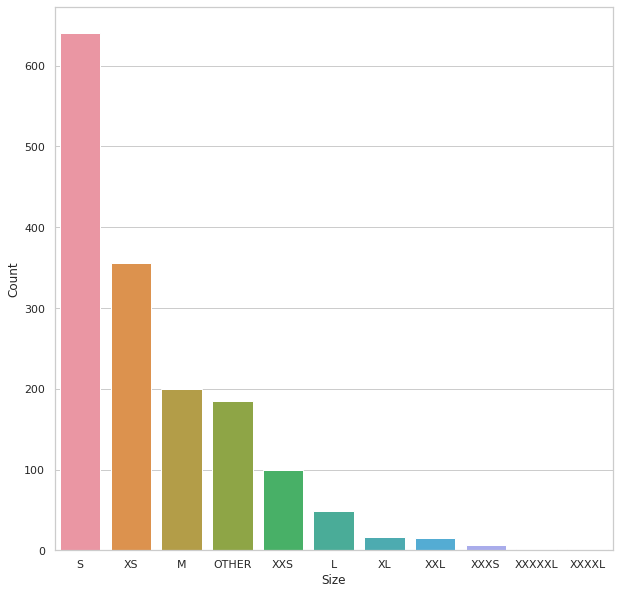

In [25]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = wish['product_variation_size_id'].value_counts().index,
              data = wish,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()

De esta gráfica de barras podemos saber que la talla que más se compra en esta plataforma es la "S" seguida por la "XS" y esto nos puede ayudar a saber que tallas surtir más y tenemos que tener un stock en el inventario. Por otro lado, las tallas más grandes son las que menos se venden, por lo tanto son las que menos se deben tener en el inventario.

Con la ayuda del mapa de calor, podemos ver la correlación de las variables de nuestra base de datos.

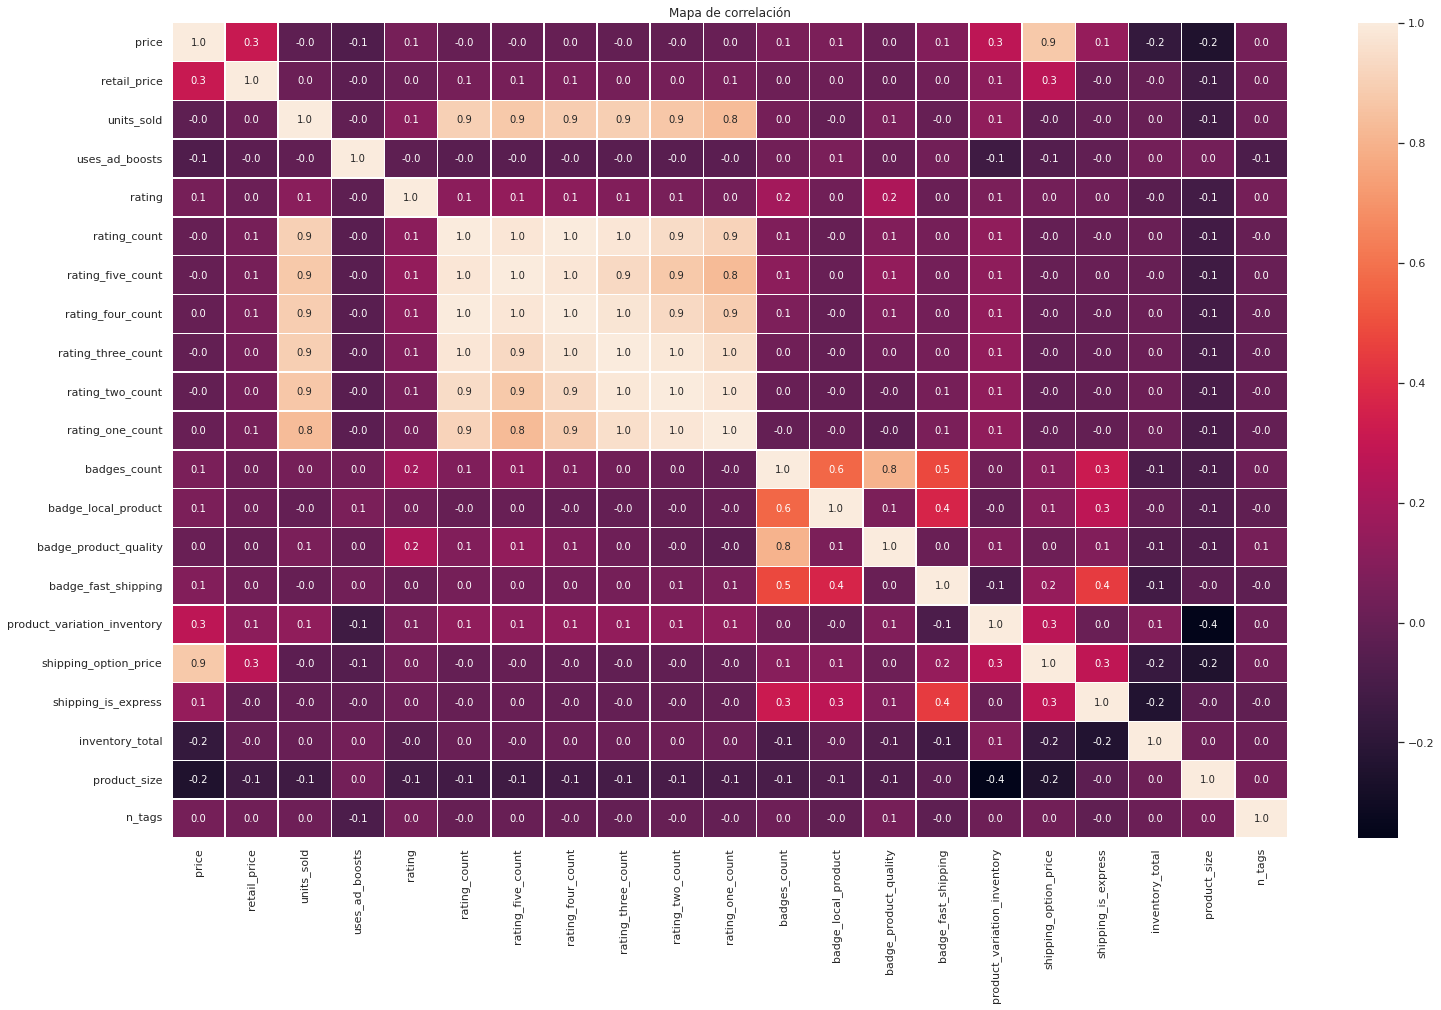

In [21]:
f,ax=plt.subplots(figsize = (25,15))
sns.heatmap(bd.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Después de realizar este gráfico, nos dimos cuenta que la variable units_sold tiene una alta correlación con las columnas de rating_count. Esto quiere decir que el numero de ventas y la cantidad de calificaciones por producto nos pueden resultar muy útiles más tarde para poder lograr nuestro objetivo de predecir el éxito de ventas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Sesgo: -2.942432
Curtosis: 11.324077


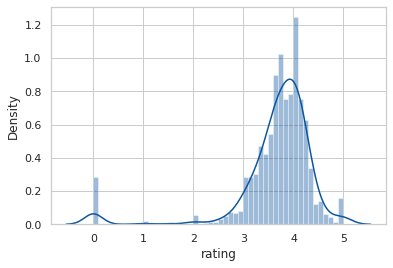

In [22]:
sns.distplot(bd['rating'])
print("Sesgo: %f" % bd['rating'].skew())
print("Curtosis: %f" % bd['rating'].kurt())

En la gráfica de arriba podemos observar la distribución de los datos de la columna rating, la cuál esta ligeramente sesgada a la derecha y cuenta con una gran curtosis. Podemos notar que es muy probable que a un producto le pongan una calificación de 4 estrellas.

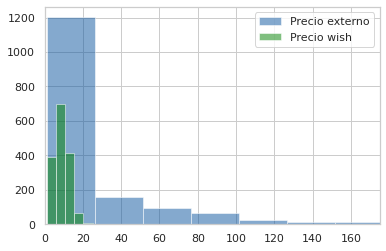

In [23]:
b = bd["price"]
a = bd["retail_price"]

plt.hist(a, alpha = 0.5, label='Precio externo')
plt.hist(b, alpha = 0.5, label='Precio wish',color="g")
plt.legend(loc='upper right')
plt.xlim(0,175)
plt.show()

En la gráfica de arriba comparamos el precio externo con el precio wish. Claramente se puede apreciar que el precio externo es más elevado que el precio wish porque el precio externo, que es la parte azul, se extiende por el eje x, mientras que el precio wish, que es la parte verde, se mantiene en valores menores a 20. 


Text(0.5, 1.0, 'Relación entre precio de envío y precio del producto')

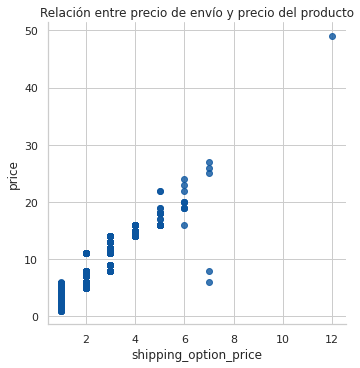

In [24]:
sns.lmplot(x='shipping_option_price', y='price', data=wish,fit_reg=False)
plt.title('Relación entre precio de envío y precio del producto')

Del scatter plot, se puede ver una tendencia lineal que, a medida que aumenta el precio de envío, el precio wish también lo hace, por lo que en lo que respecta a un análisis gráfico, persiste la idea de que estas dos variables muestran una relación entre sí

## **Conclusión**

Después de haber realizado diferentes gráficas, pudimos notar que, tenemos varias variables (como las columnas de rating) que creemos que nos pueden ayudar mucho a contruir un modelo para predecir el éxito de viernes. Sin embargo, esto lo podríamos ver con mayor claridad a la hora de usar las técnicas de míneria.


En cuanto a los demás objetivos se observó que el precio de envío y el precio wish muestran una relación lineal positiva, por lo que se puede pensar en un posible cumplimiento del objetivo. Por último, notamos una gran brecha de precios entre el que establece wish y la competencia. Esta diferencia beneficia a Wish debido a que sus precios, en su mayoría, son considerablemente más bajos que los precios de los demas.